In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
dfStarClassification = pd.read_csv("/Users/KDolp/Desktop/Физтех/Data Analysis/Lab2/Stars.csv",sep=",")
dfStarClassification.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
dfStarClassification = dfStarClassification.astype({"Type": str})

In [4]:
dfStarClassification.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [5]:
dfStarClassification.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [6]:
correlation = dfStarClassification.corr()
correlation

,Temperature,L,R,A_M
Temperature,1.000000,0.393404,0.064216,-0.420261
L,0.393404,1.000000,0.526516,-0.692619
R,0.064216,0.526516,1.000000,-0.608728
A_M,-0.420261,-0.692619,-0.608728,1.000000


<AxesSubplot:>

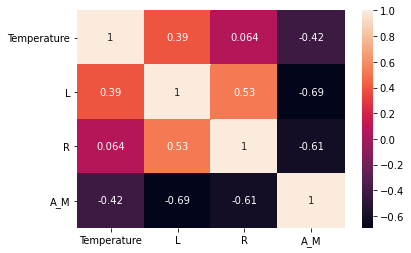

In [7]:
sns.heatmap(correlation,annot=True)

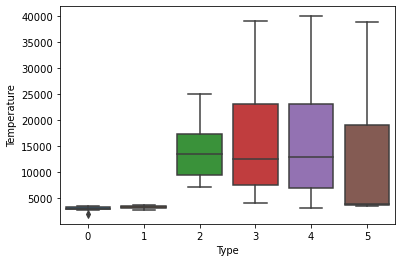

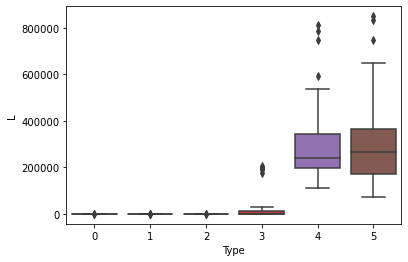

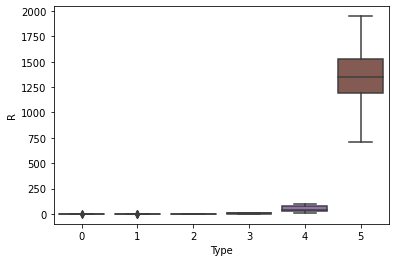

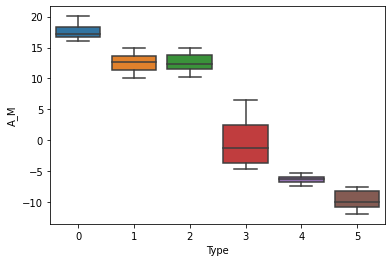

In [8]:
continuousColumns = ["Temperature","L","R","A_M"]
for item  in continuousColumns:
    sns.boxplot(x="Type", y=item, data=dfStarClassification)
    plt.show()

<AxesSubplot:title={'center':'A_M'}, xlabel='A_M', ylabel='Count'>

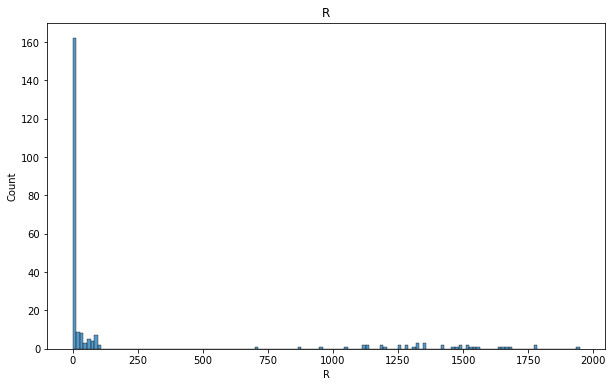

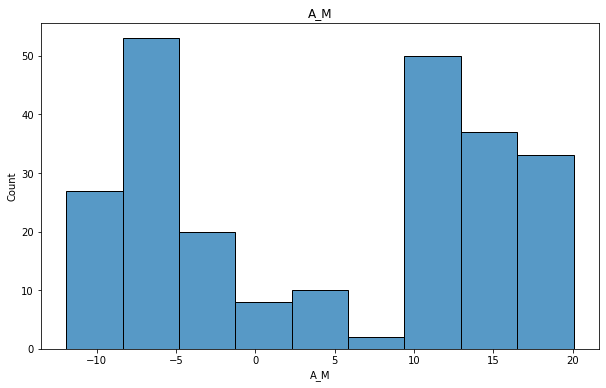

In [9]:
plt.figure(2, figsize=(10,6))
plt.title("R")
sns.histplot(dfStarClassification['R'])

plt.figure(3, figsize=(10,6)) 
plt.title("A_M")
sns.histplot(dfStarClassification['A_M'])

In [10]:
willOneHotEncode = ["Color","Spectral_Class"]
willScale  = continuousColumns

In [11]:
for item in willOneHotEncode:
    dfStarClassification = pd.concat([dfStarClassification,pd.get_dummies(dfStarClassification[item],prefix=item)],axis=1)
    dfStarClassification = dfStarClassification.drop(columns=[item])
dfStarClassification.head()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(dfStarClassification[willScale]),columns=willScale)
scaledColums.describe()

,Temperature,L,R,A_M
count,240.000000,2.400000e+02,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768
std,0.250977,2.112409e-01,0.265413,0.329347
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846
50%,0.100812,8.290363e-08,0.000387,0.632677
75%,0.344618,2.331591e-01,0.021936,0.801048
max,1.000000,1.000000e+00,1.000000,1.000000


In [13]:
dfStarClassification.drop(willScale,axis=1,inplace=True)
dfStarClassification = pd.concat([dfStarClassification,scaledColums],axis=1)
dfStarClassification

,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.029663,2.731275e-09,0.000083,0.876798
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.028980,4.944550e-10,0.000075,0.891807
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.017367,2.590003e-10,0.000048,0.957473
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.022622,1.412729e-10,0.000078,0.893371
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0.000000,6.828189e-11,0.000049,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.972150,4.412776e-01,0.695919,0.062226
236,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.759307,9.818959e-01,0.612777,0.040338
237,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.181025,6.327765e-01,0.730304,0.037211
238,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.191692,4.767253e-01,0.570694,0.021576


In [14]:
correlation = dfStarClassification.corr().abs()
correlation.head()

,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
Color_Blue,1.000000,0.115033,0.071822,0.035685,0.192294,0.050572,0.035685,0.035685,0.516047,0.095622,...,0.131815,0.152320,0.035685,0.088339,0.511743,0.810643,0.660964,0.439924,0.023897,0.355073
Color_Blue White,0.115033,1.000000,0.027146,0.013488,0.072680,0.019114,0.013488,0.013488,0.195047,0.036142,...,0.375237,0.057572,0.013488,0.033389,0.193421,0.093250,0.090590,0.124822,0.095816,0.153523
Color_Blue white,0.071822,0.027146,1.000000,0.008421,0.045379,0.011934,0.008421,0.008421,0.121781,0.022566,...,0.101983,0.035946,0.008421,0.020847,0.120765,0.058222,0.001079,0.077934,0.059825,0.110706
Color_Blue-White,0.035685,0.013488,0.008421,1.000000,0.022547,0.005930,0.004184,0.004184,0.060507,0.011212,...,0.031498,0.017860,0.004184,0.010358,0.060002,0.028928,0.010535,0.038708,0.029413,0.026232
Color_Blue-white,0.192294,0.072680,0.045379,0.022547,1.000000,0.031953,0.022547,0.022547,0.326050,0.060416,...,0.443341,0.096239,0.022547,0.055815,0.323330,0.155882,0.298831,0.002856,0.037644,0.265117


In [15]:
target = ["Type"]
features = dfStarClassification.columns.drop(target)
train,test = train_test_split(dfStarClassification,test_size = 0.33,random_state= 12)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]

In [16]:
knnModel = KNeighborsClassifier(n_neighbors=3) 
knnModel.fit(xTrain,yTrain.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [17]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.9875

In [18]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      0.93      0.96        14

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



<AxesSubplot:>

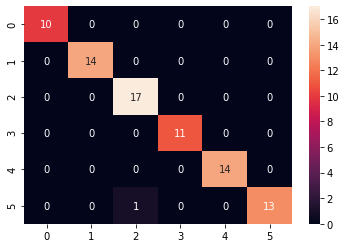

In [19]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [20]:
dTree = DecisionTreeClassifier(max_depth=4)
dTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=4)

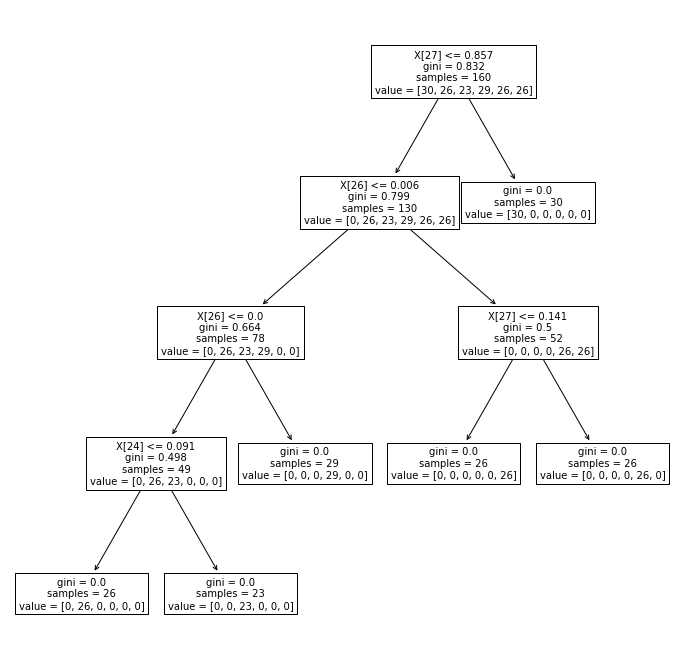

In [21]:
plt.figure(figsize=(12,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [22]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        17
           3       1.00      0.91      0.95        11
           4       1.00      0.93      0.96        14
           5       0.93      1.00      0.97        14

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [23]:
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

0.975

<AxesSubplot:>

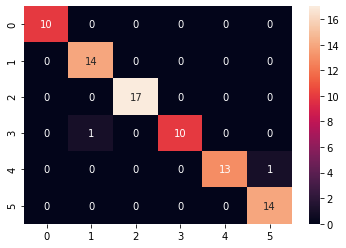

In [24]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [25]:
SVC_clsfr = SVC(kernel='linear', C=1, gamma=1)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())

SVC(C=1, gamma=1, kernel='linear')

In [26]:
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)

0.8375

In [27]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.14      0.25        14
           2       1.00      1.00      1.00        17
           3       1.00      0.91      0.95        11
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14

    accuracy                           0.84        80
   macro avg       0.90      0.84      0.80        80
weighted avg       0.92      0.84      0.81        80



<AxesSubplot:>

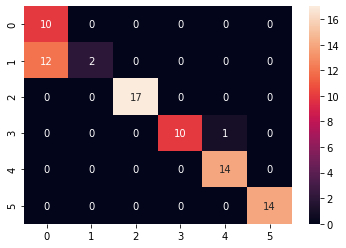

In [28]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [29]:
rForest = RandomForestClassifier(n_estimators = 200, random_state = 12)
rForest.fit(xTrain,yTrain.values.ravel())

RandomForestClassifier(n_estimators=200, random_state=12)

In [30]:
yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)

1.0

In [31]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<AxesSubplot:>

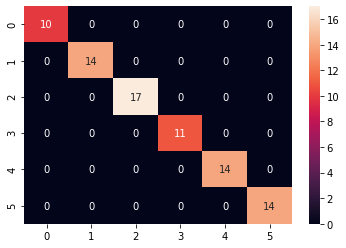

In [32]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [33]:
AdaB = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
AdaB.fit(xTrain,yTrain.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [34]:
yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)

0.9875

In [35]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        17
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



<AxesSubplot:>

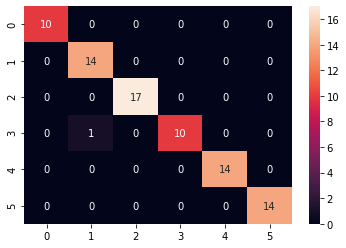

In [36]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [37]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
SVC_clsfr = SVC(kernel='linear')
grid_search = GridSearchCV(SVC_clsfr, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [38]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9787821431790393
The best parameters are:
 SVC(C=100, gamma=1, kernel='linear')


In [39]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [40]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9957390146471372
The best parameters are:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=500)


In [41]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [42]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.9730429522909241
The best parameters are:
 DecisionTreeClassifier(max_depth=8, max_features=4)


In [43]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]}
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [44]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 1.0
The best parameters are:
 RandomForestClassifier(max_depth=6, n_estimators=50)


In [45]:
param_grid ={'n_neighbors': [2,3,4,8,11,20,25]}
knnModel = KNeighborsClassifier() 
grid_search=GridSearchCV(knnModel, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

In [46]:
print("The best score is", grid_search.best_score_) 
print("The best parameters are:\n", grid_search.best_estimator_)

The best score is 0.959520639147803
The best parameters are:
 KNeighborsClassifier(n_neighbors=3)
